In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.models.MultyModalGPT2 import MultyModalGPT2
from src.data.shemas import ConfigData, ConfigTraining
from src.data.datasets import AlfredDataset
from src.pipelines.train_pipeline import train_loop

from torch.optim import AdamW
import matplotlib.pyplot as plt

In [3]:
train_cfg = ConfigTraining(
    train_data_path = "../data/raw/json_feat_2.1.0/json_feat_2.1.0/train/",
    test_data_path = "../data/raw/json_feat_2.1.0/json_feat_2.1.0/valid_seen/",
    epoch_num=10,
    data_samples_num=500
)

cfg = ConfigData(
    device="cuda",
    train_cfg=train_cfg
)

In [4]:
train_dataset = AlfredDataset(cfg, promt_type="instruction_img2next_step")
test_dataset = AlfredDataset(cfg, dataset_type="test", promt_type="instruction_img2next_step")

In [5]:
test_dataset[0]

{'promts': ['<|endoftext|>You see: <|image|>. Task: look at the clock under the lamp go to the table with the safe pick up the clock take the clock to the desk turn on the lamp. Your previous actions: . What is you next step?<|endoftext|>',
  '<|endoftext|>You see: <|image|>. Task: look at the clock under the lamp go to the table with the safe pick up the clock take the clock to the desk turn on the lamp. Your previous actions: lookdown. What is you next step?<|endoftext|>',
  '<|endoftext|>You see: <|image|>. Task: look at the clock under the lamp go to the table with the safe pick up the clock take the clock to the desk turn on the lamp. Your previous actions: lookdown. rotateleft. What is you next step?<|endoftext|>',
  '<|endoftext|>You see: <|image|>. Task: look at the clock under the lamp go to the table with the safe pick up the clock take the clock to the desk turn on the lamp. Your previous actions: lookdown. rotateleft. moveahead. What is you next step?<|endoftext|>',
  '<|en

In [6]:
mmgpt = MultyModalGPT2(cfg)
mmgpt.train()
# mmgpt.set_bias_training()
opt = AdamW(mmgpt.get_trainable_params())

In [7]:
history = train_loop(mmgpt, train_dataset, test_dataset, opt, cfg)

Epoch 1/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 2/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 3/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 4/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 5/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 6/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 7/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 8/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 9/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 10/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

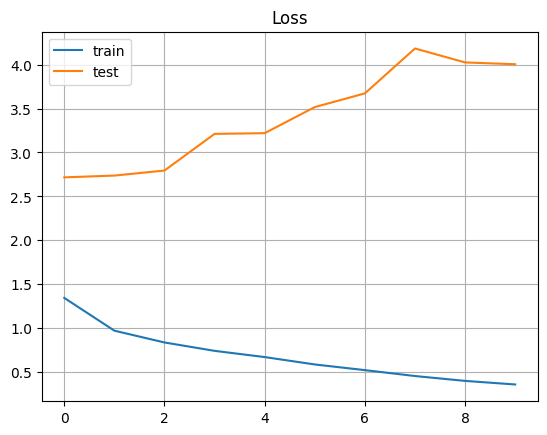

In [11]:
plt.title("Loss")
plt.plot(history["train_loss"], label="train")
plt.plot(history["test_loss"], label="test")
plt.grid()
plt.legend()

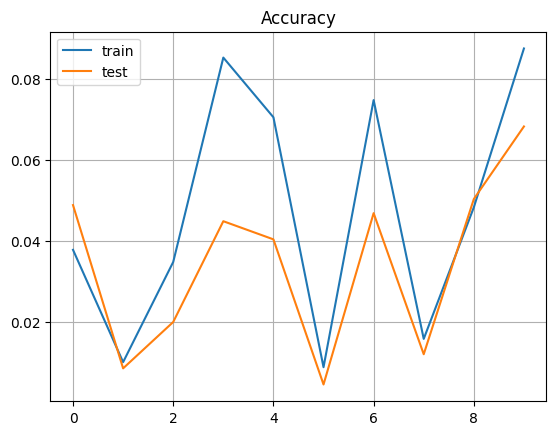

In [12]:
plt.title("Accuracy")
plt.plot(history["train_acc"], label="train")
plt.plot(history["test_acc"], label="test")
plt.grid()
plt.legend()

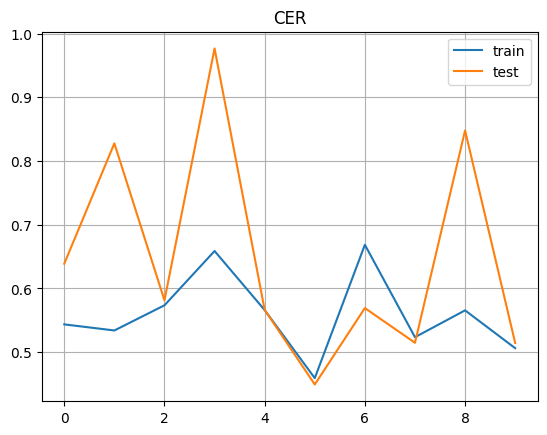

In [13]:
plt.title("CER")
plt.plot(history["train_cer"], label="train")
plt.plot(history["test_cer"], label="test")
plt.grid()
plt.legend()